## Clustering Assignment

1) Data Understanding

2) Data Cleaning

3) Data Preparation

4) Prepare Modelling

In [2]:
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Scaling
from sklearn.preprocessing import scale

# KMeans clustering 
from sklearn.cluster import KMeans

# Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


UsageError: Line magic function `%` not found.


In [5]:
country_Data = pd.read_csv("/Users/harshasmacbook-pro/Downloads/Country-data.csv",encoding = "ISO-8859-1", header= 0)
country_Data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Data Understanding

In [6]:
country_Data.shape

(167, 10)

In [7]:
country_Data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
country_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


##### Checking for missing values

In [10]:
country_Data.isnull().values.any()

False

In [11]:
country_Data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

###### There are no null values present in our dataset

## Data Cleaning 

In [12]:
#Converting percentage columns to actual values.
country_Data['exports'] = country_Data['exports']*country_Data['gdpp']/100
country_Data['imports'] = country_Data['imports']*country_Data['gdpp']/100
country_Data['health'] = country_Data['health']*country_Data['gdpp']/100

In [13]:
country_Data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### EDA

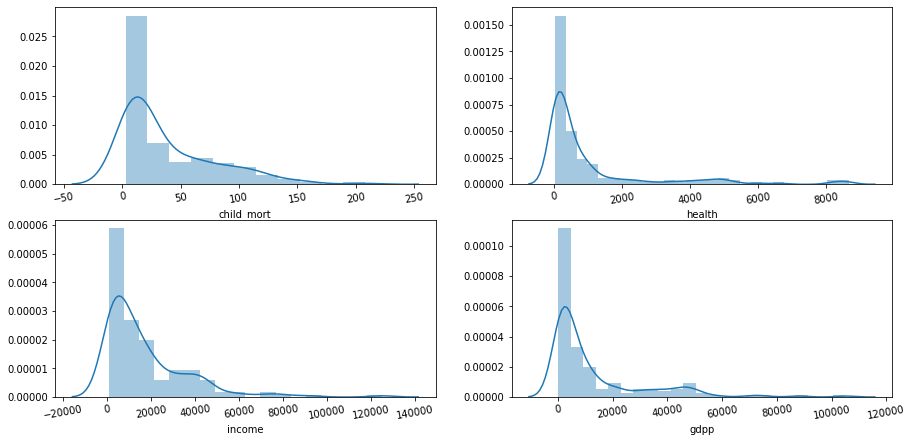

In [93]:
plt.figure(figsize=(15,15))
factors=['child_mort' , 'health' , 'income' , 'gdpp']
for i in enumerate(factors):
    ax = plt.subplot(4,2, i[0]+1)
    sns.distplot(country_Data[i[1]])
    plt.xticks(rotation=10)


##### Here all the variables are showing similar type of data variation

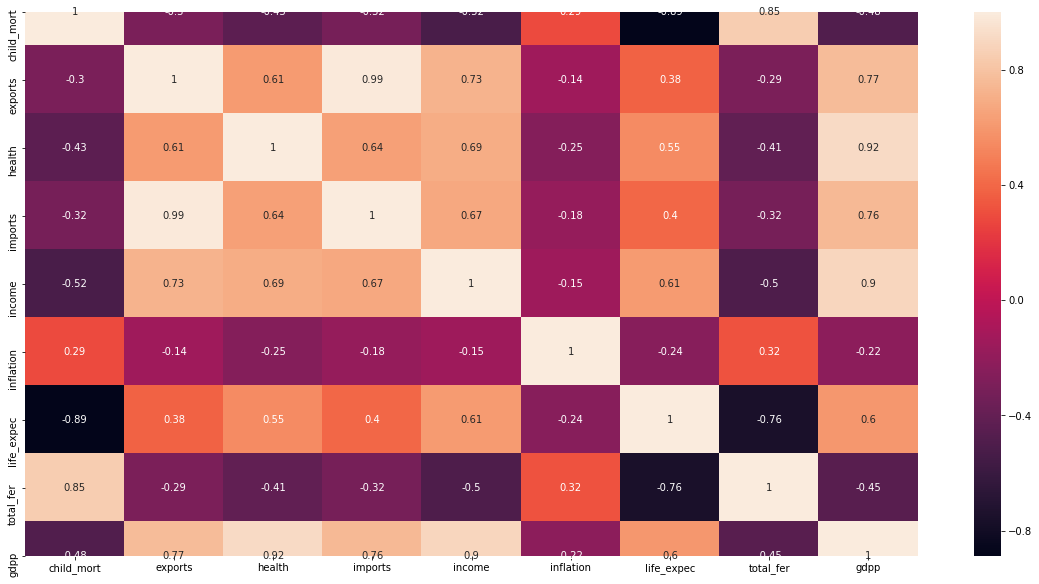

In [14]:
# plot the correlation matrix 
plt.figure(figsize = (20,10))        
sns.heatmap(country_Data.corr(),annot = True)

### Checking for outliers

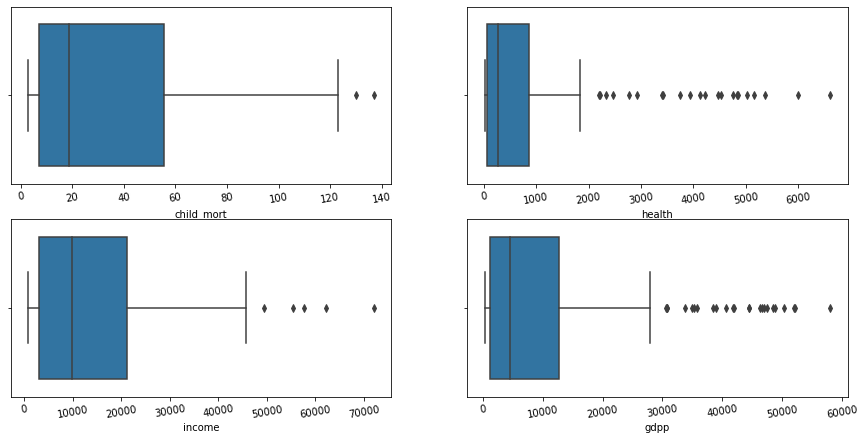

In [266]:
plt.figure(figsize=(15,15))
factors=['child_mort' , 'health' , 'income' , 'gdpp']
for i in enumerate(factors):
    ax = plt.subplot(4,2, i[0]+1)
    sns.boxplot(country_Data[i[1]])
    plt.xticks(rotation=10)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


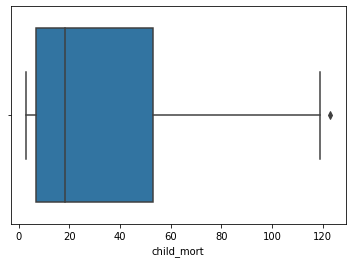

In [267]:
# performing the capping technique for child_mort

Q1 = country_Data['child_mort'].quantile(0.01)
Q4 = country_Data['child_mort'].quantile(0.99)
country_Data['child_mort'][country_Data['child_mort'] <= Q1]= Q1
country_Data['child_mort'][country_Data['child_mort'] >= Q4]= Q1

sns.boxplot(x= 'child_mort' , data= country_Data)

## Data Preparation

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


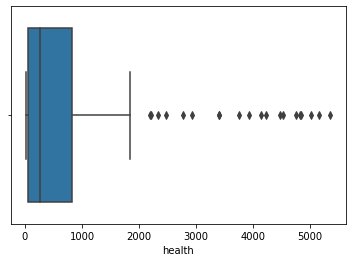

In [268]:
# performing the capping technique for health

Q1 = country_Data['health'].quantile(0.01)
Q4 = country_Data['health'].quantile(0.99)
country_Data['health'][country_Data['health'] <= Q1]= Q1
country_Data['health'][country_Data['health'] >= Q4]= Q1

sns.boxplot(x= 'health' , data= country_Data)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


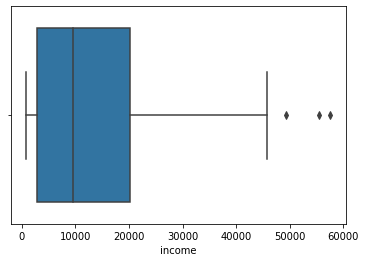

In [269]:
# performing the capping technique for income

Q1 = country_Data['income'].quantile(0.01)
Q4 = country_Data['income'].quantile(0.99)
country_Data['income'][country_Data['income'] <= Q1]= Q1
country_Data['income'][country_Data['income'] >= Q4]= Q1

sns.boxplot(x= 'income' , data= country_Data)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


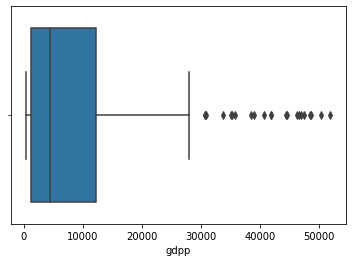

In [270]:
# performing the capping technique for gdpp

Q1 = country_Data['gdpp'].quantile(0.01)
Q4 = country_Data['gdpp'].quantile(0.99)
country_Data['gdpp'][country_Data['gdpp'] <= Q1]= Q1
country_Data['gdpp'][country_Data['gdpp'] >= Q4]= Q1

sns.boxplot(x= 'gdpp' , data= country_Data)

###### Outlier treatment in this case is done without any hard cut-offs to avoid dropping too much of countries who might actually need the aid

In [272]:
# drop the country column to make sure all columns are int values
country_Data_2=country_Data.drop(['country'],axis=1)
country_Data_2.head() 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


## Data Modelling

### Hopkins Statistics

In [273]:

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

In [274]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars)
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [275]:
hopkins(country_Data_2[list(country_Data_2.columns)])

0.9678216954137526

In [276]:
#for performing clustering we need to drop country column again 
country_Data_2=country_Data.drop(['country'],axis=1)
country_Data_2.head() 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


### Scaling the dataset

In [279]:
# apply the StandardScaler on country_Data_2 data frame
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_Data_2 = standard_scaler.fit_transform(country_Data_2)

In [280]:
country_Data_2= pd.DataFrame(country_Data_2)
country_Data_2.columns = ["child_mort" , "exports" , "health" , "imports" , "income" , "inflation" , "life_expec" , "total_fer" , "gdpp"]
country_Data_2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.720790,-0.411011,-0.592073,-0.432276,-0.902947,0.157336,-1.619092,1.902882,-0.717202
1,-0.484853,-0.350191,-0.410799,-0.313677,-0.303245,-0.312347,0.647866,-0.859973,-0.456817
2,-0.164196,-0.318526,-0.476507,-0.353720,-0.089168,0.789274,0.670423,-0.038404,-0.429578
3,2.583868,-0.291375,-0.544995,-0.345953,-0.593725,1.387054,-1.179234,2.128151,-0.498043
4,-0.673651,-0.104331,-0.035568,0.040735,0.357726,-0.601749,0.704258,-0.541946,0.140222


### K-means Clustering

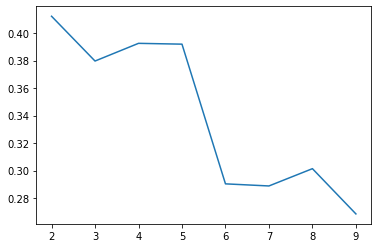

In [281]:
#Silhouette Score Analysis
ss=[]
for k in range(2,10):
    kmeans= KMeans(n_clusters = k).fit(country_Data_2)
    ss.append([k, silhouette_score(country_Data_2, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

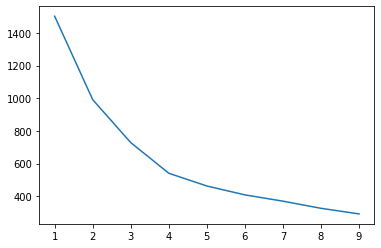

In [282]:
# Looking at the elbow-curve
ssd=[]
for k in list(range(1,10)):
    model = KMeans(n_clusters = k , max_iter=50).fit(country_Data_2)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

### K-means Clustering with the value K we are choosing

In [283]:
# KMeans clustering using value k=3
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters = 3, max_iter=50)
kmean.fit(country_Data_2[list(country_Data_2.columns)])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [284]:
# Lets make a copy of dataset before proceeding further
country_fact = country_Data.copy()

In [285]:
country_Data_2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.720790,-0.411011,-0.592073,-0.432276,-0.902947,0.157336,-1.619092,1.902882,-0.717202
1,-0.484853,-0.350191,-0.410799,-0.313677,-0.303245,-0.312347,0.647866,-0.859973,-0.456817
2,-0.164196,-0.318526,-0.476507,-0.353720,-0.089168,0.789274,0.670423,-0.038404,-0.429578
3,2.583868,-0.291375,-0.544995,-0.345953,-0.593725,1.387054,-1.179234,2.128151,-0.498043
4,-0.673651,-0.104331,-0.035568,0.040735,0.357726,-0.601749,0.704258,-0.541946,0.140222


In [286]:
col = country_Data.columns
col

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [287]:
# lets add cluster_id to original data
country_km = pd.concat( [country_Data.reset_index().drop('index' , axis=1 ) , pd.Series(kmean.labels_)], axis=1)
country_km.columns = ['country' , 'child_mort' , 'exports' , 'health' , 'imports' , 'income' , 'inflation' , 'life_expec' , 'total_fer' , 'gdpp' , 'cluster_id']
country_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [288]:
# Cross- check
country_km.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster_id    0
dtype: int64

In [289]:
#check the count of observations per cluster
country_km['cluster_id'].value_counts()

0    87
1    49
2    31
Name: cluster_id, dtype: int64

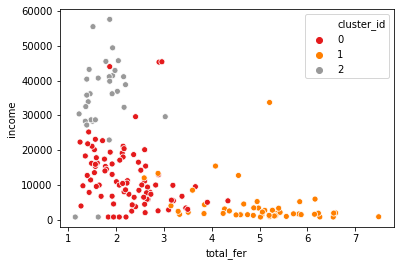

In [290]:
# Plot cluster with respect to the obtained clusters
sns.scatterplot(x= 'total_fer' , y= 'income' , hue='cluster_id' , legend='full' , data=country_km , palette='Set1')

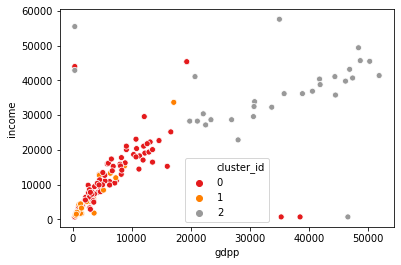

In [291]:
# Plot cluster with respect to the obtained clusters
sns.scatterplot(x= 'gdpp' , y= 'income' , hue='cluster_id' , legend='full' , data=country_km , palette='Set1')

#### Cluster Profiling - KMeans

In [292]:
country_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [184]:
country_km.drop(['exports' , 'health' , 'imports' , 'inflation' , 'life_expec' , 'total_fer'] , axis=1).groupby('cluster_id').mean()

,child_mort,income,gdpp
cluster_id,,,
0,77.947917,3901.010000,1911.400833
1,4.748485,38489.158788,34263.480606
2,21.363953,12051.357209,7050.042093


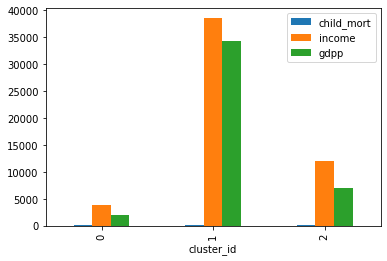

In [185]:
country_km.drop(['exports' , 'health' , 'imports' , 'inflation' , 'life_expec' , 'total_fer'] , axis=1).groupby('cluster_id').mean().plot(kind = 'bar')

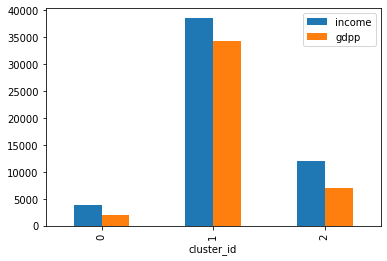

In [186]:
country_km.drop(['exports' , 'health' , 'imports' , 'inflation' , 'life_expec' , 'total_fer'] , axis=1)[['income' , 'gdpp' , 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

#### From above plots we see that Cluster 0 is the cluster with high child_mort, low income and low gdpp

In [190]:
country_km[country_km.cluster_id==0].sort_values(by=['gdpp' , 'income' , 'child_mort'], ascending= [True, True, False])[['country' , 'child_mort' , 'gdpp' , 'income']]

,country,child_mort,gdpp,income
88,Liberia,89.3,331.62,742.24
26,Burundi,93.6,331.62,764.00
37,"Congo, Dem. Rep.",116.0,334.00,742.24
112,Niger,123.0,348.00,814.00
132,Sierra Leone,2.8,399.00,1220.00
93,Madagascar,62.2,413.00,1390.00
106,Mozambique,101.0,419.00,918.00
31,Central African Republic,2.8,446.00,888.00
94,Malawi,90.5,459.00,1030.00
50,Eritrea,55.2,482.00,1420.00


### By analysing the clusters, we can conclude that countries such as  'Liberia', 'Burundi' , 'Congo,Dem. Rep' , 'Niger' &  'Sierra Leone'  are in dire need of aid and these are the top 5 countries which were required to be mentioned.

### Hierarchical Clustering

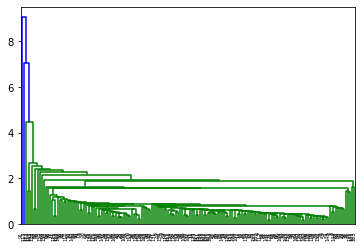

In [215]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
data3_1 = standard_scaler.fit_transform(country_Data.drop(['country'],axis=1))
mergings = linkage(data3_1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

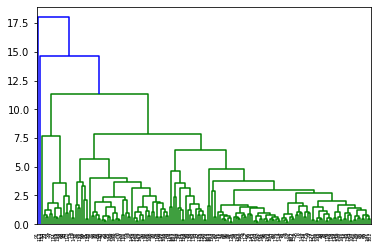

In [216]:
mergings = linkage(data3_1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [229]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
data3_hc = pd.concat([country_Data, clusterCut], axis=1)
data3_hc.columns = ['country', 'child_mort' , 'exports' , 'health' , 'imports' , 'income' , 'inflation' , 'life_expec' , 'total_fer' , 'gdpp' , 'cluster_id']

#### Cluster Profiling - Hierarchical

In [294]:
data3_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [295]:
# Cross- check
data3_hc.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster_id    0
dtype: int64

In [296]:
#check the count of observations per cluster
data3_hc['cluster_id'].value_counts()

1    101
0     47
2     17
4      1
3      1
Name: cluster_id, dtype: int64

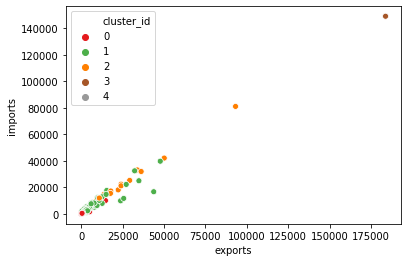

In [297]:
# Plot cluster with respect to the obtained clusters
sns.scatterplot(x= 'exports' , y= 'imports' , hue='cluster_id' , legend='full' , data=data3_hc , palette='Set1')

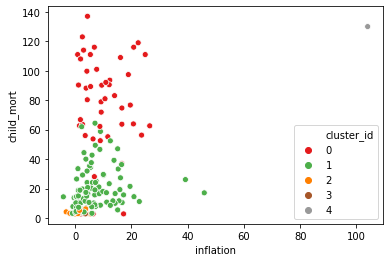

In [298]:
# Plot cluster with respect to the obtained clusters
sns.scatterplot(x= 'inflation' , y= 'child_mort' , hue='cluster_id' , legend='full' , data=data3_hc , palette='Set1')

In [299]:
data3_hc.drop(['exports' , 'health' , 'imports' , 'inflation' , 'life_expec' , 'total_fer'] , axis=1).groupby('cluster_id').mean()

,child_mort,income,gdpp
cluster_id,,,
0,76.840426,3874.435745,1902.494468
1,19.015842,15770.462574,9573.929307
2,4.152941,41941.176471,45276.470588
3,2.800000,742.240000,331.620000
4,130.000000,5150.000000,2330.000000


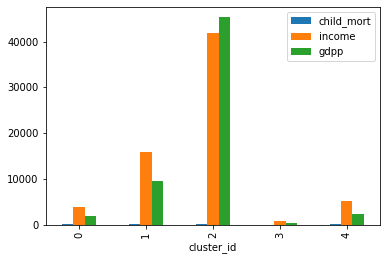

In [300]:
data3_hc.drop(['exports' , 'health' , 'imports' , 'inflation' , 'life_expec' , 'total_fer'] , axis=1).groupby('cluster_id').mean().plot(kind = 'bar')

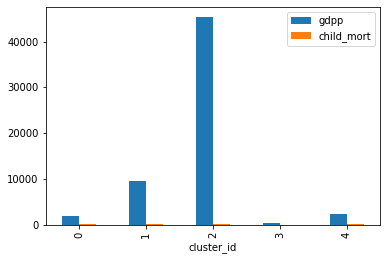

In [301]:
data3_hc.drop(['exports' , 'health' , 'imports' , 'inflation' , 'life_expec' , 'total_fer'] , axis=1)[['gdpp' , 'child_mort' , 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

In [302]:

data3_hc.groupby('cluster_id')['child_mort'].mean()

cluster_id
0     76.840426
1     19.015842
2      4.152941
3      2.800000
4    130.000000
Name: child_mort, dtype: float64

#### From above plots we see that Cluster 0 is the cluster with high child_mort, low income and low gdpp

In [303]:
data3_hc[data3_hc.cluster_id==0].sort_values(by=['gdpp' , 'income' , 'child_mort'], ascending= [True, True, False])[['country' , 'child_mort' , 'gdpp' , 'income']]

,country,child_mort,gdpp,income
88,Liberia,89.3,331.62,742.24
26,Burundi,93.6,331.62,764.00
37,"Congo, Dem. Rep.",116.0,334.00,742.24
112,Niger,123.0,348.00,814.00
132,Sierra Leone,2.8,399.00,1220.00
93,Madagascar,62.2,413.00,1390.00
106,Mozambique,101.0,419.00,918.00
31,Central African Republic,2.8,446.00,888.00
94,Malawi,90.5,459.00,1030.00
50,Eritrea,55.2,482.00,1420.00


### By analysing the clusters, we can conclude that countries such as  'Liberia', 'Burundi' , 'Congo,Dem. Rep' , 'Niger' &  'Sierra Leone'  are in dire need of aid and these are the top 5 countries which were required to be mentioned.
 